In [9]:
import pandas as pd

pd.options.mode.chained_assignment = None  

#load and clean vacme data
vacme = pd.read_csv('Data_Private/cleaned_VacMe_Gemeinden_ueber_500.csv')
vacme = vacme.fillna('')
vacme.head()

,Registration,Geschlecht,Vollstaendiger_Impfschutz,Imfgruppe,Wohngemeinde,Erstimpfung ODI Typ,Erstimpfung Gemeinde,Erstimpfung,Zweitimpfung ODI Typ,Zweitimpfung Gemeinde,Zweitimpfung
0,2021-02-28,MAENNLICH,WAHR,N,Thun,Impfzentrum,Thun,02.06.2021,Impfzentrum,Thun,30.06.2021
1,2021-10-02,WEIBLICH,WAHR,G,Thun,Impfzentrum,Thun,03.07.2021,Impfzentrum,Thun,02.08.2021
2,2021-07-05,WEIBLICH,FALSCH,F,Thun,,,,,,
3,2021-10-03,MAENNLICH,WAHR,N,Thun,Impfzentrum,Thun,03.08.2021,Impfzentrum,Thun,31.08.2021
4,2021-01-15,WEIBLICH,WAHR,A,Thun,Impfzentrum,Bern,11.02.2021,Impfzentrum,Bern,11.03.2021


In [10]:
# load community data
communities = pd.read_csv('Data_Public/gemeindeportraits.csv')
communities.head()

,bfs_nummer,gemeinde_name,bevoelkerung_einwohner,bevoelkerung_veraenderung,bevoelkerung_bevoelkerungsdichte,bevoelkerung_auslaender,altersverteilung_0_19,altersverteilung_20_64,altersverteilung_65,bevoelkerungsbewegung_heiratsziffer,...,wahl_fdp,wahl_cvp,wahl_sp,wahl_svp,wahl_evp_csp,wahl_glp,wahl_bdp,wahl_pda_sol,wahl_gps,wahl_rechtsparteien
0,301,Aarberg,4632,13.3,584,12.9,19.6,59.0,21.3,4.8,...,9.919586,0.993350,14.825120,33.668160,3.817580,9.844459,12.190100,0.303292,10.256268,1.811403
1,302,Bargen (BE),1025,4.6,130,9.3,21.1,59.7,19.2,3.0,...,3.455095,0.697999,12.785016,40.309446,4.769660,6.235458,14.006515,0.116333,9.806887,4.234528
2,303,Grossaffoltern,3031,9.0,201,6.0,19.5,60.4,20.1,4.3,...,7.896241,1.611405,13.702301,32.195941,3.862370,9.282550,13.955981,0.435901,11.719308,1.243390
3,304,Kallnach,2204,3.9,123,10.1,18.1,60.1,21.9,4.5,...,5.994442,1.100210,10.695854,41.325923,2.500992,7.287472,13.480406,0.181478,9.045540,4.236375
4,305,Kappelen,1414,12.5,129,5.7,21.5,62.0,16.5,4.9,...,5.925121,0.376066,11.950526,40.297510,2.983453,7.253886,17.482868,0.543206,7.655023,2.390105


In [11]:
community_names = sorted(communities['gemeinde_name'].tolist())
community_names

['Aarberg',
 'Aarwangen',
 'Adelboden',
 'Aefligen',
 'Aegerten',
 'Aeschi bei Spiez',
 'Affoltern im Emmental',
 'Alchenstorf',
 'Allmendingen',
 'Amsoldingen',
 'Arch',
 'Arni (BE)',
 'Attiswil',
 'Auswil',
 'Bannwil',
 'Bargen (BE)',
 'Beatenberg',
 'Bellmund',
 'Belp',
 'Belprahon',
 'Berken',
 'Bern',
 'Bettenhausen',
 'Biel/Bienne',
 'Biglen',
 'Bleienbach',
 'Blumenstein',
 'Bolligen',
 'Boltigen',
 'Bowil',
 'Bremgarten bei Bern',
 'Brenzikofen',
 'Brienz (BE)',
 'Brienzwiler',
 'Brügg',
 'Brüttelen',
 'Buchholterberg',
 'Burgdorf',
 'Burgistein',
 'Busswil bei Melchnau',
 'Bäriswil',
 'Bätterkinden',
 'Bönigen',
 'Büetigen',
 'Bühl',
 'Büren an der Aare',
 'Champoz',
 'Clavaleyres',
 'Corcelles (BE)',
 'Corgémont',
 'Cormoret',
 'Cortébert',
 'Court',
 'Courtelary',
 'Crémines',
 'Deisswil bei Münchenbuchsee',
 'Diemerswil',
 'Diemtigen',
 'Diessbach bei Büren',
 'Dotzigen',
 'Därligen',
 'Därstetten',
 'Dürrenroth',
 'Eggiwil',
 'Epsach',
 'Eriswil',
 'Eriz',
 'Erlach',
 'Erl

In [12]:
#clean vacme data
#remove records from small communities or other countries. All resident communities are valid!
vacme = vacme[(vacme['Wohngemeinde'] != 'Kleine Gemeinde') & (vacme['Wohngemeinde'] != '')]

#remove records with no first vaccination.
#attention, here we have Biel instead of Biel/Bienne and Langnau instead of Langnau im Emmental.
vacme = vacme[vacme['Erstimpfung'] != '']

#remove invalid gender entries
vacme = vacme[(vacme['Geschlecht'] == 'MAENNLICH') | (vacme['Geschlecht'] == 'WEIBLICH') | (vacme['Geschlecht'] == 'ANDERE')]

vacme.shape

(686682, 11)

In [13]:
vacc_sum_dict = vacme.groupby('Wohngemeinde').size().to_dict()
vacc_per_community = {'community': vacc_sum_dict.keys(), 'vaccinations': vacc_sum_dict.values()}
vaccination_data = pd.DataFrame(data=vacc_per_community)

In [14]:
#run only once
communities_with_vacc = communities.set_index('gemeinde_name').join(vaccination_data.set_index('community'))

In [22]:
communities_with_vacc['vacc_per_capita'] = (communities_with_vacc['vaccinations'] / communities_with_vacc['bevoelkerung_einwohner'] * 100)
communities_with_vacc = communities_with_vacc[communities_with_vacc['vaccinations'].isnull() == False]
communities_with_vacc.sort_values(by=['vacc_per_capita'])

,bfs_nummer,bevoelkerung_einwohner,bevoelkerung_veraenderung,bevoelkerung_bevoelkerungsdichte,bevoelkerung_auslaender,altersverteilung_0_19,altersverteilung_20_64,altersverteilung_65,bevoelkerungsbewegung_heiratsziffer,bevoelkerungsbewegung_scheidungsziffer,...,wahl_sp,wahl_svp,wahl_evp_csp,wahl_glp,wahl_bdp,wahl_pda_sol,wahl_gps,wahl_rechtsparteien,vaccinations,vacc_per_capita
gemeinde_name,,,,,,,,,,,,,,,,,,,,,
Walliswil bei Wangen,991,606,3.4,197,4.3,15.7,63.0,21.3,3.3,0.0,...,14.664386,52.821719,1.432236,6.626764,6.049594,0.000000,5.771697,1.175716,175.0,28.877888
Krauchthal,414,2401,4.3,124,5.7,19.5,61.8,18.7,3.4,2.9,...,11.901478,42.064039,3.157635,6.108374,11.517241,0.857143,8.137931,3.285714,739.0,30.778842
Leuzigen,388,1289,8.0,125,6.5,22.0,57.6,20.3,6.3,4.7,...,10.196882,36.827131,1.365654,7.659042,15.500171,0.079663,6.612041,3.300330,574.0,44.530644
St. Stephan,793,1330,-3.1,22,8.9,19.2,56.0,24.7,4.5,2.2,...,3.420227,64.132454,0.807020,3.727663,4.393774,0.076859,3.900596,10.894767,600.0,45.112782
Guggisberg,852,1523,-2.6,28,3.3,20.6,57.8,21.7,7.3,0.7,...,6.087086,59.668384,3.502875,3.346030,7.730226,0.194189,8.141011,6.318620,690.0,45.305318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frauenkappelen,663,1228,-2.8,132,12.0,16.5,60.8,22.6,1.6,1.6,...,11.707026,31.838336,3.521487,16.567190,10.214870,0.272851,10.786153,0.954980,934.0,76.058632
Rubigen,623,2877,0.4,416,7.8,18.1,59.5,22.4,4.5,1.0,...,16.816648,24.983127,3.610799,13.723285,13.903262,0.221222,11.856018,2.564679,2208.0,76.746611
Melchnau,333,1489,-3.3,145,14.2,21.3,55.7,23.0,1.3,2.0,...,13.763746,44.111387,4.611564,7.254346,8.265342,0.461156,7.981554,1.427811,1150.0,77.233042


In [89]:
communitites_no_vacc = communities_with_vacc.drop(columns=['bfs_nummer', 'vacc_per_capita', 'vaccinations'])
column_list = list(communitites_no_vacc.columns)
#column_list

In [95]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

communities_with_vacc = communities_with_vacc.dropna()

#all columns
#column_list = list(communitites_no_vacc.columns)
column_list = [#'bevoelkerung_einwohner',
# 'bevoelkerung_veraenderung',
# 'bevoelkerung_bevoelkerungsdichte',
# 'bevoelkerung_auslaender',
# 'altersverteilung_0_19',
# 'altersverteilung_20_64',
# 'altersverteilung_65',
# 'bevoelkerungsbewegung_heiratsziffer',
# 'bevoelkerungsbewegung_scheidungsziffer',
 'bevoelkerungsbewegung_geburtziffer',
# 'bevoelkerungsbewegung_sterbeziffer',
# 'haushalt_anzahl_privathaushalte',
 'haushalt_haushaltsgroesse_pro_person',
# 'flaeche_gesamt',
# 'flaeche_siedlung',
# 'flaeche_veraenderung',
# 'flaeche_landwirtschaft',
# 'flaeche_veraenderung.1',
# 'flaeche_wald',
# 'flaeche_unproduktiv',
# 'wirtschaft_beschaeftigte',
 'wirtschaft_beschaeftigte_1_sektor',
# 'wirtschaft_beschaeftigte_2_sektor',
# 'wirtschaft_beschaeftigte_3_sektor',
# 'wirtschaft_arbeitsstaetten',
# 'wirtschaft_arbeitsstaetten_1_sektor',
# 'wirtschaft_arbeitsstaetten_2_sektor',
# 'wirtschaft_arbeitsstaetten_3_sektor',
# 'bau_leerwohnungsziffer',
# 'bau_neu_gebaute_wohnungen',
# 'sozialhilfequote',
 'wahl_fdp',
 'wahl_cvp',
 'wahl_sp',
 'wahl_svp',
 'wahl_evp_csp',
 'wahl_glp',
 'wahl_bdp',
# 'wahl_pda_sol',
 'wahl_gps'#,
# 'wahl_rechtsparteien'
]

X = communitites_no_vacc[column_list]
y = scale.fit_transform(communities_with_vacc[['vacc_per_capita']].values)

X[column_list] = scale.fit_transform(communitites_no_vacc[column_list].values)

est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.450
Method:                 Least Squares   F-statistic:                              18.82
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    1.35e-26
Time:                        11:31:36   Log-Likelihood:                         -263.27
No. Observations:                 240   AIC:                                      548.5
Df Residuals:                     229   BIC:                                      586.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [97]:
#communitites_no_vacc.corr().to_excel('correlations.xlsx')

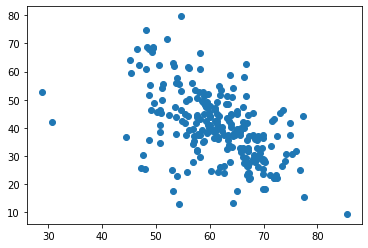

In [194]:
%matplotlib inline
from scipy import stats
from pylab import *

dependent_var = 'vacc_per_capita'
independent_var = 'wahl_svp'
independent_pretty = 'SVP'

indep = communities_with_vacc[independent_var]
dep = communities_with_vacc[dependent_var]

scatter(dep, indep)

In [195]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dep, indep)

print(r_value**2);

0.26828492712568897


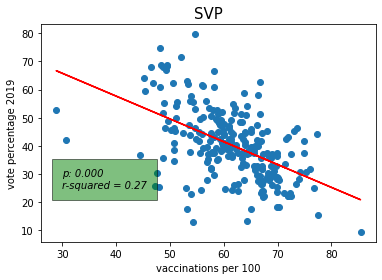

In [197]:
def predict(x):
    return slope * x + intercept

fitLine = predict(dep)
fitLine
plt.scatter(dep, indep)
plt.plot(dep, fitLine, c='r')
plt.title(independent_pretty, fontsize=15)
plt.xlabel('vaccinations per 100')
plt.ylabel('vote percentage 2019')
plt.text(30, 25, 'p: ' + '{:.3f}'.format(p_value) + '\nr-squared = ' + '{:.2f}'.format(r_value**2), style='italic', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
plt.show()